<a href="https://colab.research.google.com/github/giuliovv/tfest/blob/main/tfest_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tfest

  Created wheel for tfest: filename=tfest-0.1.7-py3-none-any.whl size=3089 sha256=119226f3647c83a7ad35f3bc0fae5bfef5254285bd30eadb3cf43b86515f7c43
  Stored in directory: /root/.cache/pip/wheels/4a/1f/dc/c840f9f1675cb3594b1cbfc66692f3ddc4cfc10495d95f30a9
Successfully built tfest


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tfest

from scipy import signal

In [ ]:
s1 = signal.lti([1], [1, 1])

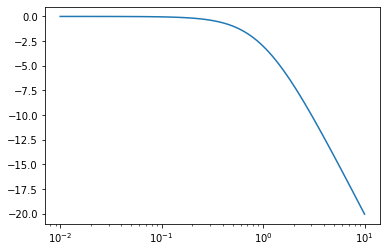

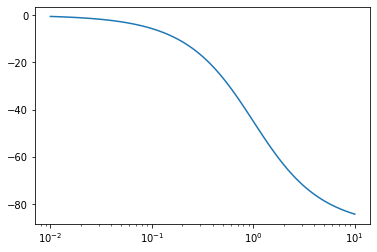

In [ ]:
w, mag, phase = s1.bode()
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

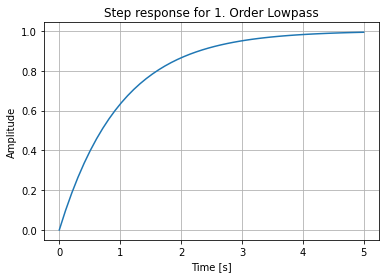

In [ ]:
t = np.linspace(0, 5, num=50)
u = np.ones_like(t)
tout, y, x = signal.lsim(s1, u, t)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [ ]:
te = tfest.tfest(u, y)

In [ ]:
te.estimate(nzeros=0, npoles=1)

Optimization terminated successfully.
         Current function value: 0.009334
         Iterations: 35
         Function evaluations: 63


 final_simplex: (array([[ 1.39422466e+00,  1.40283518e+00, -1.31130677e-03],
       [ 1.38868382e+00,  1.39728340e+00,  1.56884892e-04],
       [ 1.39117507e+00,  1.40052995e+00,  1.28444795e-03],
       [ 1.39115643e+00,  1.40198693e+00, -2.53497387e-03]]), array([0.00933431, 0.00933477, 0.00933893, 0.00942594]))
           fun: 0.00933431000693408
       message: 'Optimization terminated successfully.'
          nfev: 63
           nit: 35
        status: 0
       success: True
             x: array([ 1.39422466e+00,  1.40283518e+00, -1.31130677e-03])

In [ ]:
te.get_transfer_function()

[1.3942246626024044] [-0.0013113067699550658, 1.4028351819288938]


TransferFunctionContinuous(
array([-1063.23302415]),
array([ 1.00000000e+00, -1.06979939e+03]),
dt: None
)

[1.3942246626024044] [-0.0013113067699550658, 1.4028351819288938]


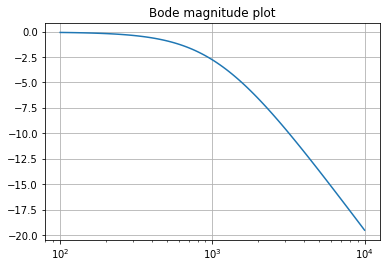

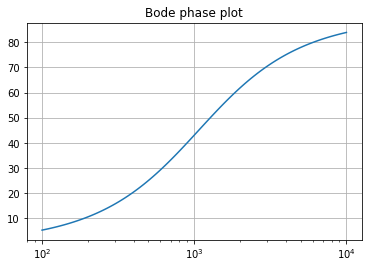

In [ ]:
te.plot_bode()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


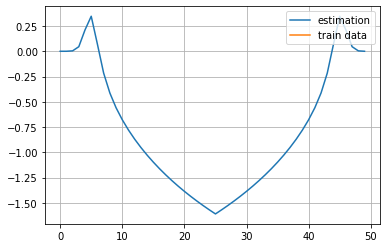

In [ ]:
te.plot()